In [1]:
import xgboost as xgb
import pandas as pd


In [6]:
dataframe = pd.DataFrame({"a":[1, 2, 3], "b":[2, 3, 4]})
dataframe.iloc[:, 0]

0    1
1    2
2    3
Name: a, dtype: int64

In [10]:
train_datasetL = pd.read_csv("../data/ori_data/train_process.csv", header=None, sep="\t").iloc[:, 0].values
dev_datasetL = pd.read_csv("../data/ori_data/dev_process.csv", header=None, sep="\t").iloc[:, 0].values

In [11]:
import numpy as np

train_datasetL = np.array(train_datasetL)
dev_datasetL = np.array(dev_datasetL)

print("===dataset length is===", len(train_datasetL))
print("===example of the dataset label===", train_datasetL[:10])

print("===dataset length is===", len(dev_datasetL))
print("===example of the dataset label===", dev_datasetL[:10])


===dataset length is=== 81981
===example of the dataset label=== [0 0 0 1 0 0 0 0 0 0]
===dataset length is=== 20495
===example of the dataset label=== [0 0 0 1 1 0 0 0 0 0]


In [12]:
import pickle
import numpy as np
import scipy
import sklearn

In [13]:
train_datamatrix = np.load("../data/ori_data/train.featurematrix.data")
dev_datamatrix = np.load("../data/ori_data/dev.featurematrix.data")

In [14]:
dict_vectorizer = pickle.load(open("../data/m_result/dict_vectorizer.model", "rb"))
dict_vectorizer

DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)

In [16]:
print(train_datamatrix.shape)
print(dev_datamatrix.shape)
train_datamatrix

(81981, 88)
(20495, 88)


array([[ 3.69230722,  3.        ,  4.8       , ...,  0.37749976,
        17.        , 11.        ],
       [ 0.90909041,  0.83333333,  1.        , ...,  0.97673098,
        14.        ,  9.        ],
       [ 1.49999953,  2.        ,  1.2       , ...,  0.55877043,
         9.        ,  6.        ],
       ...,
       [ 1.7999995 ,  1.8       ,  1.8       , ...,  0.80712203,
        12.        ,  8.        ],
       [ 4.86956473,  4.30769231,  5.6       , ...,  0.28273682,
        21.        , 15.        ],
       [ 3.06666619,  2.55555556,  3.83333333, ...,  0.53632542,
        18.        , 12.        ]])

In [88]:
# ---------------------now no use---------------------
def get_label_indices(label):
    """
    """
    pos_indices = []
    neg_indices = []
    for index, label in enumerate(label):
        if label == 1:
            pos_indices.append(index)
        else:
            neg_indices.append(index)
    return pos_indices, neg_indices

def split(datasetM, label, train_ratio=0.8):
    """
    split the dataset into train test, 10% for test 10% for valid(make the train test label )
    """
    pos_indices, neg_indices = get_label_indices(label)
    
    pos_permutaion_indices = np.random.permutation(len(pos_indices))
    neg_permutation_indices = np.random.permutation(len(neg_indices))
    
    train_pos_len = int(len(pos_indices) * train_ratio)
    train_neg_len = int(len(neg_indices) * train_ratio)
    
    train_pos_indices = pos_permutaion_indices[:train_pos_len]
    train_neg_indices = neg_permutation_indices[:train_neg_len]
    train_indices = np.concatenate((train_pos_indices, train_neg_indices))
    np.random.shuffle(train_indices)
    train_datasetM = datasetM[train_indices]
    train_datasetL = label[train_indices]
    
    test_pos_indices =pos_permutaion_indices[train_pos_len:]
    test_neg_indices = neg_permutation_indices[train_neg_len:]
    test_indices = np.concatenate((test_pos_indices, test_neg_indices))
    np.random.shuffle(test_indices)
    test_datasetM = datasetM[test_indices]
    test_datasetL = label[test_indices]
    
    return train_datasetM, train_datasetL, test_datasetM, test_datasetL

train_datasetM, train_datasetL, test_datasetM, test_datasetL = split(datamatrix, datasetL)

assert(train_datasetM.shape[0] == len(train_datasetL))
assert(test_datasetM.shape[0] == len(test_datasetL))

print("===train dataset shape====", train_datasetM.shape)
print("===test dataset shape====", test_datasetM.shape)

In [90]:
dtrain = xgb.DMatrix(train_datamatrix, train_datasetL)
dtest = xgb.DMatrix(dev_datamatrix, dev_datasetL)

In [63]:
# specify parameters via map
xgb_classifier = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=500, 
                                   silent=True, objective='binary:logistic', booster='gbtree', 
                                   n_jobs=1, nthread=None, gamma=0, min_child_weight=2, max_delta_step=0, subsample=1, 
                                   colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, 
                                   reg_lambda=0, scale_pos_weight=4, 
                                   base_score=0.5, random_state=0, seed=None, missing=None)

bst = xgb_classifier.fit(train_datamatrix, train_datasetL, eval_set=[(dev_datamatrix, dev_datasetL)])

[0]	validation_0-error:0.262161
[1]	validation_0-error:0.28485
[2]	validation_0-error:0.286216
[3]	validation_0-error:0.274018
[4]	validation_0-error:0.278361
[5]	validation_0-error:0.278165
[6]	validation_0-error:0.280459
[7]	validation_0-error:0.277824
[8]	validation_0-error:0.274799
[9]	validation_0-error:0.274799
[10]	validation_0-error:0.275726
[11]	validation_0-error:0.275726
[12]	validation_0-error:0.274896
[13]	validation_0-error:0.275921
[14]	validation_0-error:0.276506
[15]	validation_0-error:0.27636
[16]	validation_0-error:0.276994
[17]	validation_0-error:0.276702
[18]	validation_0-error:0.276116
[19]	validation_0-error:0.275628
[20]	validation_0-error:0.276458
[21]	validation_0-error:0.276946
[22]	validation_0-error:0.277921
[23]	validation_0-error:0.277775
[24]	validation_0-error:0.277238
[25]	validation_0-error:0.277531
[26]	validation_0-error:0.276799
[27]	validation_0-error:0.276555
[28]	validation_0-error:0.276214
[29]	validation_0-error:0.276116
[30]	validation_0-erro

In [62]:
# make prediction
preds = bst.predict(dev_datamatrix)

pred_label = preds >= 0.5
pred_label = pred_label.astype(int)
from sklearn.metrics import classification_report
print(classification_report(dev_datasetL, pred_label))

             precision    recall  f1-score   support

          0       0.85      0.91      0.88     16751
          1       0.43      0.30      0.35      3744

avg / total       0.78      0.80      0.78     20495



/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [51]:
import pickle
pickle.dump(xgb_classifier, open("../data/m_result/xgb_0.model", "wb"), 2)

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x7fccdef956a0>>
Traceback (most recent call last):
  File "/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/xgboost-0.6-py3.5.egg/xgboost/core.py", line 368, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


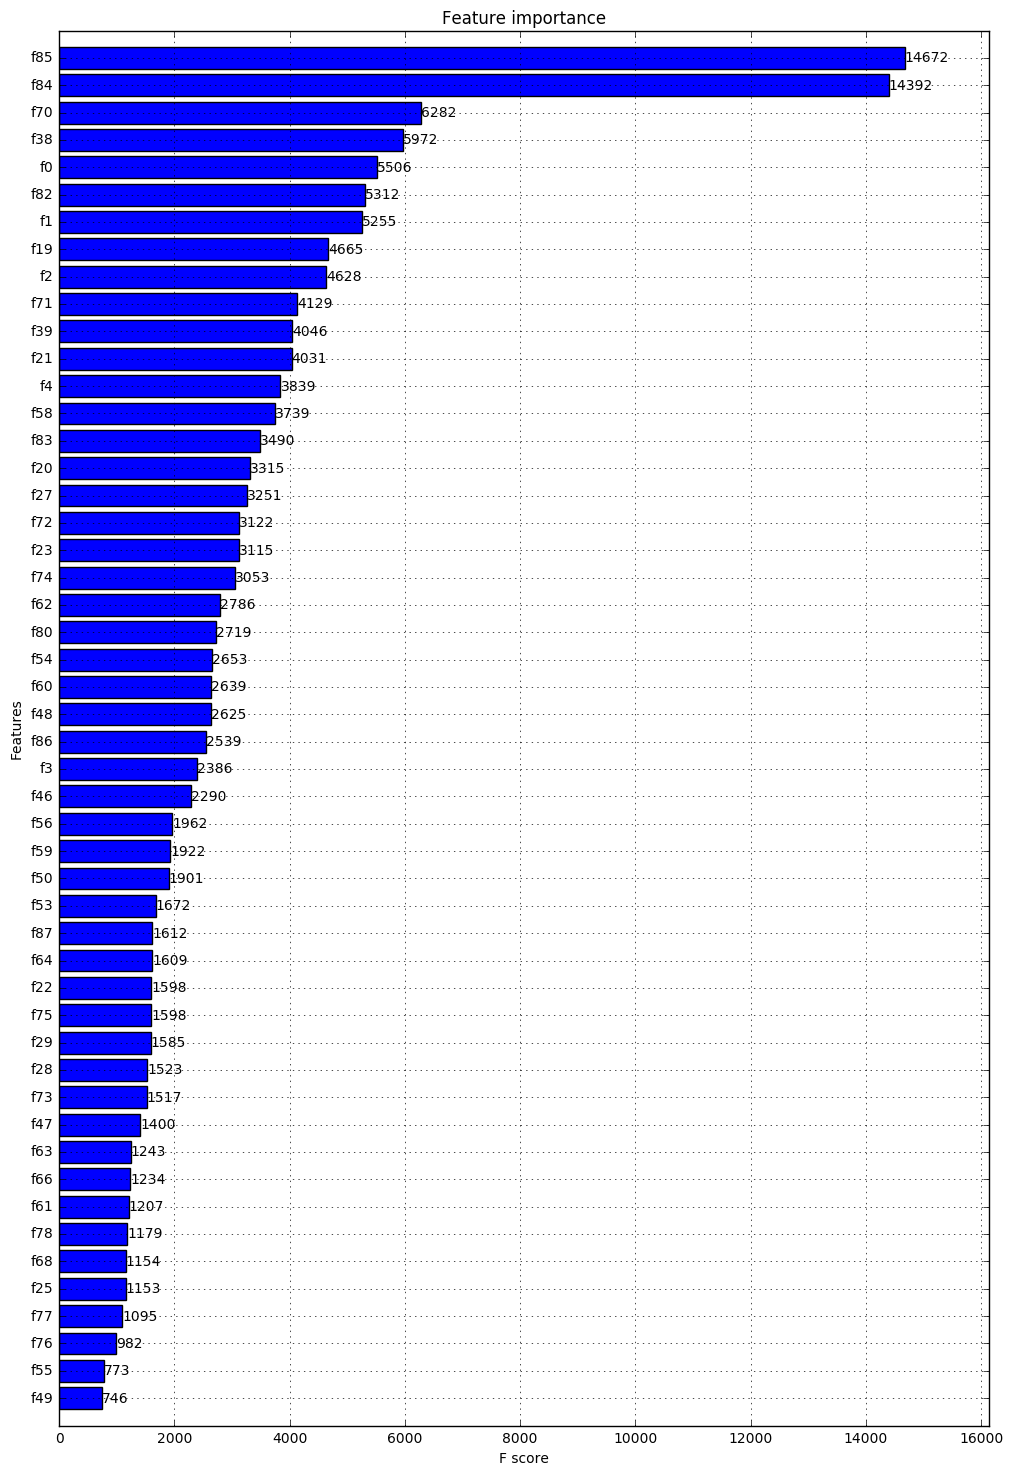

In [118]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(xgb_classifier, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [33]:
scipy.stats.uniform(0.01, 0.07)

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate

X = train_datamatrix
y = train_datasetL

clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')

param_dist = {'n_estimators': [100, 200, 400, 600, 800, 1000],
              'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.09, 0.1],
              'subsample': [1.0, 0.9, 0.8],
              'max_depth': [3, 5, 7, 9, 11],
              'min_child_weight': [1, 2, 3],
              'scale_pos_weight': [4, 3, 2, 1]
             }

clf = RandomizedSearchCV(clf_xgb, param_distributions = param_dist, n_iter = 25, scoring = 'f1', error_score = 0, verbose = 3, n_jobs = -1)

clf.fit(X, y)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] n_estimators=1000, max_depth=11, min_child_weight=2, scale_pos_weight=2, subsample=0.8, learning_rate=0.07 
[CV] n_estimators=1000, max_depth=11, min_child_weight=2, scale_pos_weight=2, subsample=0.8, learning_rate=0.07 
[CV] n_estimators=1000, max_depth=11, min_child_weight=2, scale_pos_weight=2, subsample=0.8, learning_rate=0.07 
[CV] n_estimators=100, max_depth=9, min_child_weight=2, scale_pos_weight=3, subsample=1.0, learning_rate=0.07 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=100, max_depth=9, min_child_weight=2, scale_pos_weight=3, subsample=1.0, learning_rate=0.07, score=0.4528593508500772, total=  53.0s
[CV] n_estimators=100, max_depth=9, min_child_weight=2, scale_pos_weight=3, subsample=1.0, learning_rate=0.07 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=100, max_depth=9, min_child_weight=2, scale_pos_weight=3, subsample=1.0, learning_rate=0.07, score=0.4394627691092238, total=  52.9s
[CV] n_estimators=100, max_depth=9, min_child_weight=2, scale_pos_weight=3, subsample=1.0, learning_rate=0.07 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=100, max_depth=9, min_child_weight=2, scale_pos_weight=3, subsample=1.0, learning_rate=0.07, score=0.4402874864625382, total=  53.0s
[CV] n_estimators=400, max_depth=7, min_child_weight=3, scale_pos_weight=4, subsample=0.9, learning_rate=0.09 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=400, max_depth=7, min_child_weight=3, scale_pos_weight=4, subsample=0.9, learning_rate=0.09, score=0.44688644688644685, total= 2.7min
[CV] n_estimators=400, max_depth=7, min_child_weight=3, scale_pos_weight=4, subsample=0.9, learning_rate=0.09 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=400, max_depth=7, min_child_weight=3, scale_pos_weight=4, subsample=0.9, learning_rate=0.09, score=0.4358182620202911, total= 2.6min
[CV] n_estimators=400, max_depth=7, min_child_weight=3, scale_pos_weight=4, subsample=0.9, learning_rate=0.09 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=400, max_depth=7, min_child_weight=3, scale_pos_weight=4, subsample=0.9, learning_rate=0.09, score=0.44311688311688313, total= 2.8min
[CV] n_estimators=1000, max_depth=9, min_child_weight=2, scale_pos_weight=3, subsample=0.9, learning_rate=0.01 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empt

[CV]  n_estimators=1000, max_depth=11, min_child_weight=2, scale_pos_weight=2, subsample=0.8, learning_rate=0.07, score=0.3459003427366201, total=11.7min
[CV] n_estimators=1000, max_depth=9, min_child_weight=2, scale_pos_weight=3, subsample=0.9, learning_rate=0.01 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=1000, max_depth=11, min_child_weight=2, scale_pos_weight=2, subsample=0.8, learning_rate=0.07, score=0.3370816245535123, total=11.9min
[CV] n_estimators=1000, max_depth=9, min_child_weight=2, scale_pos_weight=3, subsample=0.9, learning_rate=0.01 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=1000, max_depth=11, min_child_weight=2, scale_pos_weight=2, subsample=0.8, learning_rate=0.07, score=0.33430079155672826, total=12.1min
[CV] n_estimators=600, max_depth=3, min_child_weight=1, scale_pos_weight=1, subsample=0.8, learning_rate=0.1 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=600, max_depth=3, min_child_weight=1, scale_pos_weight=1, subsample=0.8, learning_rate=0.1, score=0.2989911342097218, total= 1.8min
[CV] n_estimators=600, max_depth=3, min_child_weight=1, scale_pos_weight=1, subsample=0.8, learning_rate=0.1 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=600, max_depth=3, min_child_weight=1, scale_pos_weight=1, subsample=0.8, learning_rate=0.1, score=0.2892223738062756, total= 1.8min
[CV] n_estimators=600, max_depth=3, min_child_weight=1, scale_pos_weight=1, subsample=0.8, learning_rate=0.1 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=600, max_depth=3, min_child_weight=1, scale_pos_weight=1, subsample=0.8, learning_rate=0.1, score=0.2898462475262597, total= 1.9min
[CV] n_estimators=800, max_depth=11, min_child_weight=3, scale_pos_weight=4, subsample=0.8, learning_rate=0.07 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=1000, max_depth=9, min_child_weight=2, scale_pos_weight=3, subsample=0.9, learning_rate=0.01, score=0.44256348246674726, total= 9.4min
[CV] n_estimators=800, max_depth=11, min_child_weight=3, scale_pos_weight=4, subsample=0.8, learning_rate=0.07 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=1000, max_depth=9, min_child_weight=2, scale_pos_weight=3, subsample=0.9, learning_rate=0.01, score=0.44066099148723087, total= 9.2min
[CV] n_estimators=800, max_depth=11, min_child_weight=3, scale_pos_weight=4, subsample=0.8, learning_rate=0.07 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=1000, max_depth=9, min_child_weight=2, scale_pos_weight=3, subsample=0.9, learning_rate=0.01, score=0.43534921604561194, total= 9.3min
[CV] n_estimators=800, max_depth=9, min_child_weight=3, scale_pos_weight=4, subsample=0.9, learning_rate=0.07 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=800, max_depth=11, min_child_weight=3, scale_pos_weight=4, subsample=0.8, learning_rate=0.07, score=0.3789197567664242, total= 9.5min
[CV] n_estimators=800, max_depth=9, min_child_weight=3, scale_pos_weight=4, subsample=0.9, learning_rate=0.07 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=800, max_depth=9, min_child_weight=3, scale_pos_weight=4, subsample=0.9, learning_rate=0.07, score=0.4004343105320304, total= 6.8min
[CV] n_estimators=800, max_depth=9, min_child_weight=3, scale_pos_weight=4, subsample=0.9, learning_rate=0.07 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=800, max_depth=11, min_child_weight=3, scale_pos_weight=4, subsample=0.8, learning_rate=0.07, score=0.3715509039010466, total= 9.1min
[CV] n_estimators=600, max_depth=3, min_child_weight=3, scale_pos_weight=3, subsample=0.8, learning_rate=0.03 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=800, max_depth=11, min_child_weight=3, scale_pos_weight=4, subsample=0.8, learning_rate=0.07, score=0.3768531802965089, total= 8.8min
[CV] n_estimators=600, max_depth=3, min_child_weight=3, scale_pos_weight=3, subsample=0.8, learning_rate=0.03 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=600, max_depth=3, min_child_weight=3, scale_pos_weight=3, subsample=0.8, learning_rate=0.03, score=0.4629960672148731, total= 1.4min
[CV] n_estimators=600, max_depth=3, min_child_weight=3, scale_pos_weight=3, subsample=0.8, learning_rate=0.03 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=600, max_depth=3, min_child_weight=3, scale_pos_weight=3, subsample=0.8, learning_rate=0.03, score=0.45098924925467526, total= 1.4min
[CV] n_estimators=400, max_depth=9, min_child_weight=1, scale_pos_weight=1, subsample=0.9, learning_rate=0.07 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=600, max_depth=3, min_child_weight=3, scale_pos_weight=3, subsample=0.8, learning_rate=0.03, score=0.45657612580414586, total= 1.4min
[CV] n_estimators=400, max_depth=9, min_child_weight=1, scale_pos_weight=1, subsample=0.9, learning_rate=0.07 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=800, max_depth=9, min_child_weight=3, scale_pos_weight=4, subsample=0.9, learning_rate=0.07, score=0.4037875489769265, total= 5.6min
[CV] n_estimators=400, max_depth=9, min_child_weight=1, scale_pos_weight=1, subsample=0.9, learning_rate=0.07 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=800, max_depth=9, min_child_weight=3, scale_pos_weight=4, subsample=0.9, learning_rate=0.07, score=0.4015594541910331, total= 5.6min
[CV] n_estimators=600, max_depth=7, min_child_weight=2, scale_pos_weight=1, subsample=0.9, learning_rate=0.01 


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 34.4min
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=400, max_depth=9, min_child_weight=1, scale_pos_weight=1, subsample=0.9, learning_rate=0.07, score=0.3103957471943296, total= 2.9min
[CV] n_estimators=600, max_depth=7, min_child_weight=2, scale_pos_weight=1, subsample=0.9, learning_rate=0.01 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=400, max_depth=9, min_child_weight=1, scale_pos_weight=1, subsample=0.9, learning_rate=0.07, score=0.2986305404211456, total= 2.8min
[CV] n_estimators=600, max_depth=7, min_child_weight=2, scale_pos_weight=1, subsample=0.9, learning_rate=0.01 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=400, max_depth=9, min_child_weight=1, scale_pos_weight=1, subsample=0.9, learning_rate=0.07, score=0.3015030946065429, total= 2.8min
[CV] n_estimators=600, max_depth=3, min_child_weight=2, scale_pos_weight=4, subsample=0.9, learning_rate=0.1 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=600, max_depth=7, min_child_weight=2, scale_pos_weight=1, subsample=0.9, learning_rate=0.01, score=0.2775778438429041, total= 3.3min
[CV] n_estimators=600, max_depth=3, min_child_weight=2, scale_pos_weight=4, subsample=0.9, learning_rate=0.1 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=600, max_depth=3, min_child_weight=2, scale_pos_weight=4, subsample=0.9, learning_rate=0.1, score=0.46142322097378274, total= 1.4min
[CV] n_estimators=600, max_depth=3, min_child_weight=2, scale_pos_weight=4, subsample=0.9, learning_rate=0.1 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=600, max_depth=7, min_child_weight=2, scale_pos_weight=1, subsample=0.9, learning_rate=0.01, score=0.28136998924896334, total= 3.3min
[CV] n_estimators=100, max_depth=3, min_child_weight=1, scale_pos_weight=2, subsample=0.9, learning_rate=0.05 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=100, max_depth=3, min_child_weight=1, scale_pos_weight=2, subsample=0.9, learning_rate=0.05, score=0.4189891355692017, total=  13.5s
[CV] n_estimators=100, max_depth=3, min_child_weight=1, scale_pos_weight=2, subsample=0.9, learning_rate=0.05 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=100, max_depth=3, min_child_weight=1, scale_pos_weight=2, subsample=0.9, learning_rate=0.05, score=0.40402366863905326, total=  14.2s
[CV] n_estimators=100, max_depth=3, min_child_weight=1, scale_pos_weight=2, subsample=0.9, learning_rate=0.05 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=600, max_depth=7, min_child_weight=2, scale_pos_weight=1, subsample=0.9, learning_rate=0.01, score=0.2880074085507022, total= 3.3min
[CV] n_estimators=200, max_depth=5, min_child_weight=3, scale_pos_weight=1, subsample=0.8, learning_rate=0.07 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=600, max_depth=3, min_child_weight=2, scale_pos_weight=4, subsample=0.9, learning_rate=0.1, score=0.45156889495225105, total= 1.4min
[CV] n_estimators=200, max_depth=5, min_child_weight=3, scale_pos_weight=1, subsample=0.8, learning_rate=0.07 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=600, max_depth=3, min_child_weight=2, scale_pos_weight=4, subsample=0.9, learning_rate=0.1, score=0.4590827338129497, total= 1.3min
[CV] n_estimators=200, max_depth=5, min_child_weight=3, scale_pos_weight=1, subsample=0.8, learning_rate=0.07 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=100, max_depth=3, min_child_weight=1, scale_pos_weight=2, subsample=0.9, learning_rate=0.05, score=0.4134831460674157, total=  13.6s
[CV] n_estimators=200, max_depth=9, min_child_weight=2, scale_pos_weight=2, subsample=0.9, learning_rate=0.03 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=200, max_depth=5, min_child_weight=3, scale_pos_weight=1, subsample=0.8, learning_rate=0.07, score=0.2867737948084055, total=  46.4s
[CV] n_estimators=200, max_depth=9, min_child_weight=2, scale_pos_weight=2, subsample=0.9, learning_rate=0.03 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=200, max_depth=5, min_child_weight=3, scale_pos_weight=1, subsample=0.8, learning_rate=0.07, score=0.2859761686526123, total=  47.9s
[CV] n_estimators=200, max_depth=9, min_child_weight=2, scale_pos_weight=2, subsample=0.9, learning_rate=0.03 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=200, max_depth=5, min_child_weight=3, scale_pos_weight=1, subsample=0.8, learning_rate=0.07, score=0.29078665442301804, total=  47.4s
[CV] n_estimators=600, max_depth=9, min_child_weight=1, scale_pos_weight=2, subsample=0.9, learning_rate=0.05 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=200, max_depth=9, min_child_weight=2, scale_pos_weight=2, subsample=0.9, learning_rate=0.03, score=0.417723018599692, total= 1.6min
[CV] n_estimators=600, max_depth=9, min_child_weight=1, scale_pos_weight=2, subsample=0.9, learning_rate=0.05 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=200, max_depth=9, min_child_weight=2, scale_pos_weight=2, subsample=0.9, learning_rate=0.03, score=0.40291204200978636, total= 1.6min
[CV] n_estimators=600, max_depth=9, min_child_weight=1, scale_pos_weight=2, subsample=0.9, learning_rate=0.05 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=200, max_depth=9, min_child_weight=2, scale_pos_weight=2, subsample=0.9, learning_rate=0.03, score=0.4054827175208582, total= 1.6min
[CV] n_estimators=100, max_depth=7, min_child_weight=2, scale_pos_weight=2, subsample=0.8, learning_rate=0.03 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=100, max_depth=7, min_child_weight=2, scale_pos_weight=2, subsample=0.8, learning_rate=0.03, score=0.4179174484052533, total=  34.3s
[CV] n_estimators=100, max_depth=7, min_child_weight=2, scale_pos_weight=2, subsample=0.8, learning_rate=0.03 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=100, max_depth=7, min_child_weight=2, scale_pos_weight=2, subsample=0.8, learning_rate=0.03, score=0.41217798594847777, total=  35.6s
[CV] n_estimators=100, max_depth=7, min_child_weight=2, scale_pos_weight=2, subsample=0.8, learning_rate=0.03 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=100, max_depth=7, min_child_weight=2, scale_pos_weight=2, subsample=0.8, learning_rate=0.03, score=0.4139142656359803, total=  36.0s
[CV] n_estimators=100, max_depth=5, min_child_weight=3, scale_pos_weight=1, subsample=1.0, learning_rate=0.07 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=100, max_depth=5, min_child_weight=3, scale_pos_weight=1, subsample=1.0, learning_rate=0.07, score=0.271523178807947, total=  21.2s
[CV] n_estimators=100, max_depth=5, min_child_weight=3, scale_pos_weight=1, subsample=1.0, learning_rate=0.07 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=100, max_depth=5, min_child_weight=3, scale_pos_weight=1, subsample=1.0, learning_rate=0.07, score=0.278932671424139, total=  21.5s
[CV] n_estimators=100, max_depth=5, min_child_weight=3, scale_pos_weight=1, subsample=1.0, learning_rate=0.07 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=600, max_depth=9, min_child_weight=1, scale_pos_weight=2, subsample=0.9, learning_rate=0.05, score=0.3792712142226705, total= 4.3min
[CV] n_estimators=200, max_depth=7, min_child_weight=3, scale_pos_weight=4, subsample=0.8, learning_rate=0.05 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=100, max_depth=5, min_child_weight=3, scale_pos_weight=1, subsample=1.0, learning_rate=0.07, score=0.28069630090146097, total=  21.5s
[CV] n_estimators=200, max_depth=7, min_child_weight=3, scale_pos_weight=4, subsample=0.8, learning_rate=0.05 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=600, max_depth=9, min_child_weight=1, scale_pos_weight=2, subsample=0.9, learning_rate=0.05, score=0.37063989962358845, total= 4.3min
[CV] n_estimators=200, max_depth=7, min_child_weight=3, scale_pos_weight=4, subsample=0.8, learning_rate=0.05 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=200, max_depth=7, min_child_weight=3, scale_pos_weight=4, subsample=0.8, learning_rate=0.05, score=0.459497645211931, total= 1.4min
[CV] n_estimators=800, max_depth=7, min_child_weight=3, scale_pos_weight=3, subsample=0.8, learning_rate=0.09 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=200, max_depth=7, min_child_weight=3, scale_pos_weight=4, subsample=0.8, learning_rate=0.05, score=0.44976, total= 1.3min
[CV] n_estimators=800, max_depth=7, min_child_weight=3, scale_pos_weight=3, subsample=0.8, learning_rate=0.09 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=600, max_depth=9, min_child_weight=1, scale_pos_weight=2, subsample=0.9, learning_rate=0.05, score=0.3758305127240818, total= 4.6min
[CV] n_estimators=800, max_depth=7, min_child_weight=3, scale_pos_weight=3, subsample=0.8, learning_rate=0.09 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=200, max_depth=7, min_child_weight=3, scale_pos_weight=4, subsample=0.8, learning_rate=0.05, score=0.45618171814823544, total= 1.4min
[CV] n_estimators=200, max_depth=9, min_child_weight=2, scale_pos_weight=1, subsample=0.8, learning_rate=0.05 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=200, max_depth=9, min_child_weight=2, scale_pos_weight=1, subsample=0.8, learning_rate=0.05, score=0.29366165070679434, total= 1.9min
[CV] n_estimators=200, max_depth=9, min_child_weight=2, scale_pos_weight=1, subsample=0.8, learning_rate=0.05 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=200, max_depth=9, min_child_weight=2, scale_pos_weight=1, subsample=0.8, learning_rate=0.05, score=0.29395070948469004, total= 2.0min
[CV] n_estimators=200, max_depth=9, min_child_weight=2, scale_pos_weight=1, subsample=0.8, learning_rate=0.05 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=800, max_depth=7, min_child_weight=3, scale_pos_weight=3, subsample=0.8, learning_rate=0.09, score=0.4033559212649242, total= 5.5min
[CV] n_estimators=600, max_depth=3, min_child_weight=2, scale_pos_weight=2, subsample=0.8, learning_rate=0.05 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=800, max_depth=7, min_child_weight=3, scale_pos_weight=3, subsample=0.8, learning_rate=0.09, score=0.41274593669803256, total= 5.7min
[CV] n_estimators=600, max_depth=3, min_child_weight=2, scale_pos_weight=2, subsample=0.8, learning_rate=0.05 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=800, max_depth=7, min_child_weight=3, scale_pos_weight=3, subsample=0.8, learning_rate=0.09, score=0.40938441670253983, total= 5.7min
[CV] n_estimators=600, max_depth=3, min_child_weight=2, scale_pos_weight=2, subsample=0.8, learning_rate=0.05 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=200, max_depth=9, min_child_weight=2, scale_pos_weight=1, subsample=0.8, learning_rate=0.05, score=0.30145623780213177, total= 1.9min
[CV] n_estimators=400, max_depth=3, min_child_weight=3, scale_pos_weight=4, subsample=1.0, learning_rate=0.09 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=600, max_depth=3, min_child_weight=2, scale_pos_weight=2, subsample=0.8, learning_rate=0.05, score=0.4336827711941659, total= 1.7min
[CV] n_estimators=400, max_depth=3, min_child_weight=3, scale_pos_weight=4, subsample=1.0, learning_rate=0.09 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=600, max_depth=3, min_child_weight=2, scale_pos_weight=2, subsample=0.8, learning_rate=0.05, score=0.4197839681637294, total= 1.8min
[CV] n_estimators=400, max_depth=3, min_child_weight=3, scale_pos_weight=4, subsample=1.0, learning_rate=0.09 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=600, max_depth=3, min_child_weight=2, scale_pos_weight=2, subsample=0.8, learning_rate=0.05, score=0.43, total= 1.8min
[CV] n_estimators=1000, max_depth=7, min_child_weight=1, scale_pos_weight=3, subsample=0.8, learning_rate=0.1 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=400, max_depth=3, min_child_weight=3, scale_pos_weight=4, subsample=1.0, learning_rate=0.09, score=0.45918519623936727, total= 1.1min
[CV] n_estimators=1000, max_depth=7, min_child_weight=1, scale_pos_weight=3, subsample=0.8, learning_rate=0.1 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=400, max_depth=3, min_child_weight=3, scale_pos_weight=4, subsample=1.0, learning_rate=0.09, score=0.45370440015043245, total= 1.1min
[CV] n_estimators=1000, max_depth=7, min_child_weight=1, scale_pos_weight=3, subsample=0.8, learning_rate=0.1 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=400, max_depth=3, min_child_weight=3, scale_pos_weight=4, subsample=1.0, learning_rate=0.09, score=0.4584565345949142, total= 1.1min
[CV] n_estimators=100, max_depth=9, min_child_weight=1, scale_pos_weight=1, subsample=1.0, learning_rate=0.05 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=100, max_depth=9, min_child_weight=1, scale_pos_weight=1, subsample=1.0, learning_rate=0.05, score=0.2744063324538259, total=  56.6s
[CV] n_estimators=100, max_depth=9, min_child_weight=1, scale_pos_weight=1, subsample=1.0, learning_rate=0.05 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=100, max_depth=9, min_child_weight=1, scale_pos_weight=1, subsample=1.0, learning_rate=0.05, score=0.2843271127294796, total=  56.4s
[CV] n_estimators=100, max_depth=9, min_child_weight=1, scale_pos_weight=1, subsample=1.0, learning_rate=0.05 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=100, max_depth=9, min_child_weight=1, scale_pos_weight=1, subsample=1.0, learning_rate=0.05, score=0.2865434550175653, total=  56.5s
[CV] n_estimators=600, max_depth=5, min_child_weight=2, scale_pos_weight=2, subsample=0.8, learning_rate=0.03 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=600, max_depth=5, min_child_weight=2, scale_pos_weight=2, subsample=0.8, learning_rate=0.03, score=0.4340289656745353, total= 3.0min
[CV] n_estimators=600, max_depth=5, min_child_weight=2, scale_pos_weight=2, subsample=0.8, learning_rate=0.03 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=1000, max_depth=7, min_child_weight=1, scale_pos_weight=3, subsample=0.8, learning_rate=0.1, score=0.3839744321424495, total= 7.2min
[CV] n_estimators=600, max_depth=5, min_child_weight=2, scale_pos_weight=2, subsample=0.8, learning_rate=0.03 


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=1000, max_depth=7, min_child_weight=1, scale_pos_weight=3, subsample=0.8, learning_rate=0.1, score=0.3837638376383764, total= 7.2min


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=1000, max_depth=7, min_child_weight=1, scale_pos_weight=3, subsample=0.8, learning_rate=0.1, score=0.3841350601295097, total= 7.1min


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=600, max_depth=5, min_child_weight=2, scale_pos_weight=2, subsample=0.8, learning_rate=0.03, score=0.41850371216447746, total= 2.2min


/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  n_estimators=600, max_depth=5, min_child_weight=2, scale_pos_weight=2, subsample=0.8, learning_rate=0.03, score=0.42563399588759426, total= 1.9min


[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 63.1min finished


RandomizedSearchCV(cv=None, error_score=0,
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=25, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 400, 600, 800, 1000], 'max_depth': [3, 5, 7, 9, 11], 'min_child_weight': [1, 2, 3], 'scale_pos_weight': [4, 3, 2, 1], 'subsample': [1.0, 0.9, 0.8], 'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.09, 0.1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=3)

In [47]:
best_xgb = clf.best_estimator_

# make prediction
preds = best_xgb.predict(dev_datamatrix)

pred_label = preds >= 0.5
pred_label = pred_label.astype(int)
from sklearn.metrics import classification_report
print(classification_report(dev_datasetL, pred_label))

             precision    recall  f1-score   support

          0       0.90      0.75      0.82     16751
          1       0.35      0.61      0.45      3744

avg / total       0.80      0.73      0.75     20495



/home/xueyunzhe/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [48]:
best_xgb.get_xgb_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 2,
 'missing': None,
 'n_estimators': 600,
 'nthread': 1,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 4,
 'seed': 0,
 'silent': 1,
 'subsample': 0.9}

In [52]:
pickle.dump(clf.best_estimator_, open("../data/m_result/xgboost_1.model", "wb"), 2)

In [53]:
arr = np.array([[1, 2], [0, 4]])
np.sum(arr, axis=0)

array([1, 6])